In [1]:
import pandas as pd

## Violations per facility - CAA

In [ ]:
usa_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/caa_viol_years.csv'
exemptions_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Violations-HON-FullList.csv'
date_column = 'EARLIEST_FRV_DETERM_DATE'
data_column = 'Viol/fac'
graph_title = 'Violations per facility--All USA facilities versus Exemption facilities'
y_axis = 'Violations/facility'

## Inspections per facility - CAA

In [2]:
usa_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/caa_insp_years.csv'
exemptions_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Inspections-HON-FullList.csv'
date_column = 'ACTUAL_END_DATE'
data_column = 'Insp/fac'
graph_title = 'Inspections per facility--All USA facilities versus Exemption facilities'
y_axis = 'Inspections/facility'

In [3]:
usa = pd.read_csv(usa_filename)
usa.set_index('Year', inplace=True)
usa['Who'] = 'USA'
usa.rename(columns={'USA' : data_column}, inplace=True)
usa

,Insp/fac,Who
Year,,
2017,0.242600,USA
2018,0.241280,USA
2019,0.250329,USA
2020,0.238048,USA
2021,0.246561,USA
2022,0.243620,USA
2023,0.237665,USA
2024,0.229361,USA


In [4]:
num_facs = 386
exemptions = pd.read_csv(exemptions_filename)
exemptions = exemptions[['REGISTRY_ID', date_column]]
exemptions['Date'] = pd.to_datetime(exemptions[date_column])
exemptions['Year'] = pd.DatetimeIndex(exemptions['Date']).year
exemptions

,REGISTRY_ID,ACTUAL_END_DATE,Date,Year
0,110069332065,2017-11-15,2017-11-15,2017
1,110069332065,2017-11-15,2017-11-15,2017
2,110041647466,2018-04-10,2018-04-10,2018
3,110028925581,2018-09-25,2018-09-25,2018
4,110028925581,2017-11-27,2017-11-27,2017
...,...,...,...,...
6571,110000470008,2018-07-19,2018-07-19,2018
6572,110000470008,2020-08-12,2020-08-12,2020
6573,110000470008,2024-06-27,2024-06-27,2024
6574,110000470008,2023-06-07,2023-06-07,2023


In [5]:
df = exemptions.groupby(['Year', 'REGISTRY_ID']).count()
df = df.reset_index()
df1 = df.groupby(['Year']).count()
df2 = df.groupby(['Year']).sum()
df3 = df2.join(df1, lsuffix='_l', rsuffix='_r')
df3 = df3[['Date_l']]
df3[data_column] = df3['Date_l']/num_facs
df3['Who'] = 'Exemptions'
df3.drop(['Date_l'], axis=1, inplace=True)
df3

,Insp/fac,Who
Year,,
2017,2.036269,Exemptions
2018,2.085492,Exemptions
2019,2.225389,Exemptions
2020,2.222798,Exemptions
2021,2.124352,Exemptions
2022,2.051813,Exemptions
2023,2.202073,Exemptions
2024,2.088083,Exemptions


In [6]:
df4 = pd.concat([df3, usa], axis=0)
df4

,Insp/fac,Who
Year,,
2017,2.036269,Exemptions
2018,2.085492,Exemptions
2019,2.225389,Exemptions
2020,2.222798,Exemptions
2021,2.124352,Exemptions
2022,2.051813,Exemptions
2023,2.202073,Exemptions
2024,2.088083,Exemptions
2017,0.242600,USA


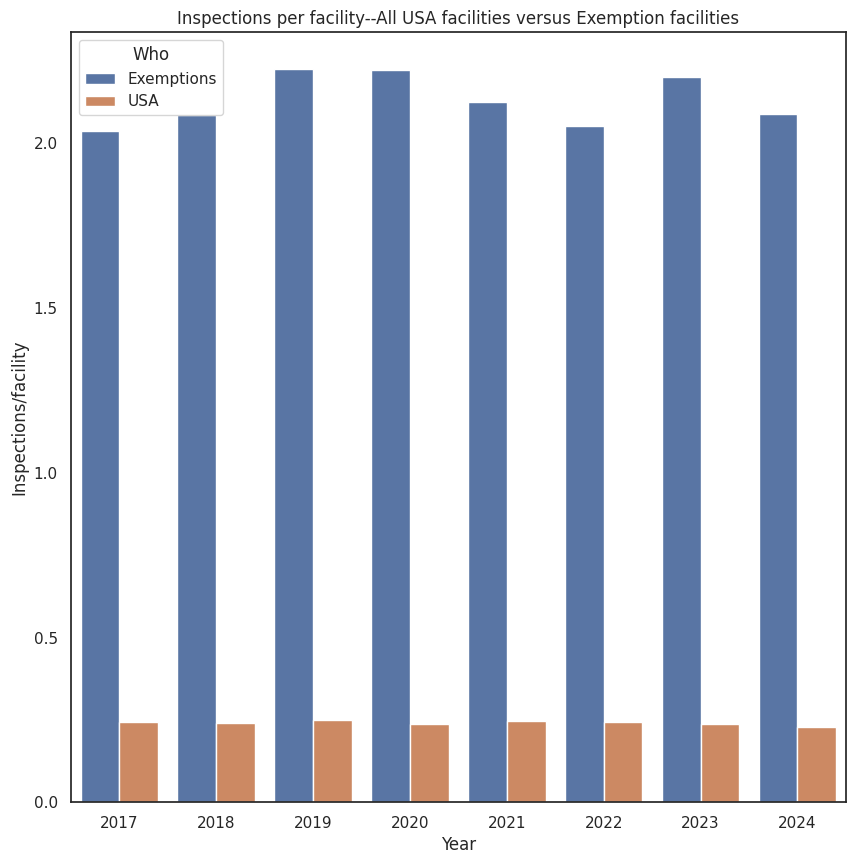

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
# sns.barplot(x='Year', y=data_column, hue='Who', data=df4) 

fig, ax = plt.subplots(figsize=(10,10))
try:
    g = sns.barplot(x='Year', y=data_column, hue='Who', data=df4)
    g.set_title(graph_title)
    #  ax.set_xlabel(xlabel)
    ax.set_ylabel(y_axis)
    # ax.set_yticks(ax.get_yticks())
    # ax.set_yticks(range(len(df)))
    # ax.set_yticklabels(df['FAC_NAME'])
except TypeError as te:
    print("TypeError: {}".format(str(te)))
